<a href="https://colab.research.google.com/github/aimetz/Bears/blob/master/405_Proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


---
title: 'Project 1: Meeting Problems'
author: "Aiden Metz, Roman Turangan"
---

Xavier and Yolanda are supposed to meet at 12:30pm. Instead, their arrival times $X$ and $Y$ are random variables, each measured as minutes after noon. (So, for example, Xavier is right on time if $X=30$.)  Each of them will wait at most 15 minutes for the other, so they only meet if their arrival times are at most 15 minutes apart. 

In this project, I will present several possible probability distributions for $X$ and $Y$, and you will use both simulation and mathematics to analyze the problem.

### Scenario 1: Xavier and Yolanda arrive independently and uniformly between 12pm and 1pm, so that $X \sim \hbox{Unif}[0,60]$ and $Y \sim \hbox{Unif}[0,60]$.

#### 1. Simulate at least 10,000 $(X,Y)$ pairs. 


In [23]:
%%R
X <- runif(10000, 0, 60)
Y <- runif(10000, 0, 60)

#### 2. Create a scatterplot of these pairs, _color-coded_ to distinguish points where $X$ and $Y$ are less vs. more than 15 apart.

You should create a _function_ that takes in two vectors X and Y and returns the 
required scatterplot, because you'll make several similar plots later in this project.

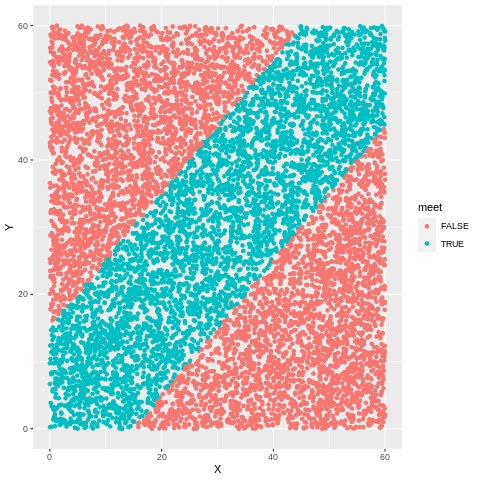

In [24]:
%%R
library(ggplot2)

plot.meetings<- function(X,Y){
dat = data.frame(X, Y, meet=abs(X-Y)<15)
ggplot(data=dat, aes(x=X, y=Y, col=meet))+geom_point()
}
plot.meetings(X,Y)

#### 3. Use your simulation to estimate the probability that Xavier and Yolanda meet.

In [25]:
%%R
paste0("Simulated probability Xavier and Yolanda meet: ", as.character(mean(abs(X-Y)<15)))

[1] "Simulated probability Xavier and Yolanda meet: 0.441"


#### 4. Use your simulation to estimate the average _absolute_ difference in their arrival times.

In [26]:
%%R
paste0("Simulated average absolute difference: ", as.character(mean(abs(X-Y))), " Minutes")

[1] "Simulated average absolute difference: 19.9639816754339 Minutes"


#### 5. Use your simulation to estimate how long they should agree to wait for each other, in order to have a 50% chance of meeting. 

[Hint: The information you need lies in the absolute differences.]

In [27]:
%%R
paste0("Need to wait ", quantile(abs(X-Y), .5), " minutes to have a simulated 50% chance of meeting")

[1] "Need to wait 17.4464425002225 minutes to have a simulated 50% chance of meeting"


Now you're going to use math to find the exact answer. Because $(X,Y)$ is uniformly distributed, the probability $(X,Y)$ falls in any region is just the area of that region divided by the total area where $(X,Y)$ can occur. 

#### 6. Use geometry to determine the area of the stripe where $X$ and $Y$ are less than 15 apart, and then tell me the probability Xavier and Yolanda meet.


In [28]:
%%R
total.area = 60*60
red.triangle = 1/2 * 45*45
blue.stripe = (total.area-2*red.triangle)
paste0("area of blue stripe: ", blue.stripe)

[1] "area of blue stripe: 1575"


In [29]:
%%R
paste0("Actual probability of meeting: ",as.character(blue.stripe/total.area))

[1] "Actual probability of meeting: 0.4375"


#### 7. Suppose they agree to each wait at most $m$ minutes for each other. Again using geometry, determine the value of $m$ for which they have a 50% chance of meeting.

$.5=\frac{(60^2 - (60-x)^2)}{60^2} $
<br>
$ 60^2 - 60^2*.5 = (60-x)^2$
<br>
$ x = 60-\sqrt{60^2 - 60^2*.5}$

In [30]:
%%R
paste0("M = Actual wait time to have a 50% chance of meeting is ", 60 - (60^2 - 60^2*.5)^.5, " Minutes")

[1] "M = Actual wait time to have a 50% chance of meeting is 17.5735931288071 Minutes"


### Scenario 2: Xavier and Yolanda's arrival times are independent and normally distributed. Specifically, $X \sim N(30,10)$ and $Y \sim N(30,10)$.  Assume again that they'll wait at most 15 minutes for each other.

#### 8. Should the probability they meet under this model be higher or lower than under the previous uniform model?  Why?

The probability should be higher because now they are alot more likely to both meet towards the middle of the hour making them much more likely to be within 15 minututes of each other

#### 9. Simulate at least 10,000 $(X,Y)$ pairs. Create a scatterplot of these pairs, color-coded to distinguish points where $X$ and $Y$ are less vs. more than 15 apart.

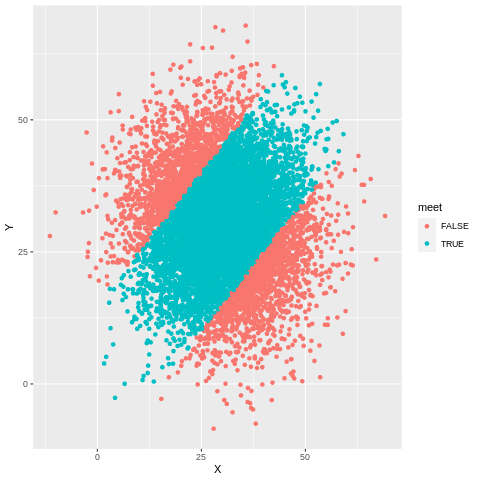

In [31]:
%%R
X = rnorm(10000, 30, 10)
Y = rnorm(10000, 30, 10)
plot.meetings(X, Y)

#### 10. Use your simulation to estimate the probability that Xavier and Yolanda meet.


In [32]:
%%R
paste0("simulated probability Xavier and Yolanda meet: ", as.character(mean(abs(X-Y)<15)))

[1] "simulated probability Xavier and Yolanda meet: 0.7064"



#### 11. Math time!  Determine the exact probability that Xavier and Yolanda meet under this model. 

[Hint: The difference of two independent normal random variables is normal.  But what are the mean and standard deviation of this difference?]

$P(-15<X-Y<15) $<br> 
$\Rightarrow X-Y\sim N(\mu_x-\mu_y, \sqrt{\sigma_x^2+\sigma_y^2}) $<br> 
$\Rightarrow P(-15< N(30-30, \sqrt{10^2+10^2})<15)$<br> 
$ = (-15< N(0, \sqrt{200})<15) $

In [33]:
%%R
paste0("Actual probability Xavier and Yolanda meet: ", as.character(pnorm(15, 0, sqrt(200))-pnorm(-15, 0, sqrt(200))))

[1] "Actual probability Xavier and Yolanda meet: 0.711155633653515"


#### 12. Suppose they agree to each wait at most $m$ minutes for each other. Determine the value of $m$ for which they have a 50% chance of meeting.

$ .5 = P(-m < N(0, \sqrt{200}) < m) $ <br>
$ ⇒ m $ is the $.75$ Quantile of $N(0, \sqrt{200})$ and $ -m $ is the $.25$ Quantile of $N(0, \sqrt{200})$

In [34]:
%%R
paste0("M = Actual wait time to have a 50% chance of meeting is ",  as.character(qnorm(.75, 0, sqrt(200))), " Minutes")

[1] "M = Actual wait time to have a 50% chance of meeting is 9.5387255240894 Minutes"



### Scenario 3: Their arrival times are normally distributed, but correlated. That is, $(X,Y)$ have a bivariate normal distribution.

#### 13. Explain how the correlation between $X$ and $Y$ should affect the likelihood that Xavier and Yolanda meet.  Make sure to discuss the effects of both $\rho > 0$ and $\rho < 0$. 




#### 14. For the rest of this section, assume $\rho = +.7$.  Simulate at least 10,000 $(X,Y)$ pairs. Create a scatterplot of these pairs, color-coded to distinguish points where $X$ and $Y$ are less vs. more than 15 apart. 

[You may have to research how to simulate from a bivariate normal distribution. Perhaps the book will help?]

In [35]:
%%R
34

[1] 34


#### 15. Use your simulation to estimate the probability that Xavier and Yolanda meet.  How does this answer compare to the independent case, and why does that make sense?

In [36]:
%%R
23

[1] 23


#### 16. Math time again! Determine the exact probability that Xavier and Yolanda meet under this model.
[Hint: The difference is still normal, but something changes....]




### Scenario 4: the joint distribution of $(X,Y)$ has density function
$$ f(x,y) = K \cdot (900 + 30x + 30y - xy), 0 \leq x \leq 60, 0 \leq y \leq 60$$

#### 17. Use the accept-reject method to create a simulation of $(X,Y)$.

[You will need to read PSTEMA Section 7.6 to see how accept-reject extends to the bivariate case. You should use independent Unif[0,60] distributions as your candidate distributions.]


In [37]:
%%R
2

[1] 2


#### 18. It isn't obvious, but the _marginal_ distributions of $X$ and $Y$ are in fact both Unif[0,60] here!  Make some histograms to confirm that's true for your simulation.

In [38]:
%%R
2

[1] 2


#### 19. Make a color-coded scatterplot like before. Do you think that $X$ and $Y$ are positively correlated or negatively correlated? Use R to verify your conjecture.

In [39]:
%%R
2

[1] 2


#### 20. Use your simulation to estimate the probability that Xavier and Yolanda meet.

In [40]:
%%R
2

[1] 2
